In [1]:
import numpy as np
import pandas as pd

In [17]:
data = pd.read_csv(r"dataset/boston.csv")

data.drop("Unnamed: 0", axis=1, inplace=True)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [18]:
class LinearRegression:
    ''' 使用线性回归，梯度下降'''
    def __init__(self, alpha, times):
        '''初始化方法
        Parameters
        ----------
        alpha: float
        学习率：控制步长，权重调整的梯度
        times：int
        循环迭代次数
        '''
        self.alpha = alpha
        self.times = times
        
    def fit(self, X, y):
        ''' 根据提供的训练数据，对模型进行训练
         parameters
        --------
        X: 类数组类型, shape：[样本数量，特征数量]
        待训练的样本特征
        y: 类数组类型，shape：样本数量
        每个样本的目标值（标签）
        '''
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量，初始值=0，长度比特征数量多1，即截距
        self.w = np.zeros(1+X.shape[1])
        # 创建损失列表，保存每次迭代后的损失值（预测值-真实值）的平方和除2
        self.loss = []
        # 循环多次迭代，每次循环调整权重值，使得损失值不断下降
        for i in range(self.times):
            # 计算预测值
            y_hat = np.dot(X, self.w[1:])+self.w[0]
            # 计算损失
            self.loss.append(np.sum((y - y_hat)**2)/2)
            # 调整梯度，梯度下降，根据差距调整，wj = wj + alpha*sum((y-y_hat)*x(j))
            self.w[0] += self.alpha*np.sum(y-y_hat)
            self.w[1:] += self.alpha*np.dot(X.T,(y-y_hat))

    def predict(self, X):
        ''' 根据提供的数据，对模型进行预测
         parameters
        --------
        X: 类数组类型, shape：[样本数量，特征数量]
        待预测的样本特征
        returns
        ---------
        y: 类数组类型，shape：样本数量
        每个样本的目标值（标签）
        '''
        X = np.asarray(X)
        result = np.dot(X, self.w[1:])+self.w[0]
        return result

In [8]:
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]
lr = LinearRegression(alpha=0.001, times = 30)
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result-test_y)**2))
display(lr.w)
display(lr.loss)

inf

array([-1.90795658e+151, -5.37688345e+153, -9.16774634e+151,
       -1.89567083e+152, -2.29973111e+152, -1.28733027e+150,
       -1.08271214e+151, -1.18946731e+152, -1.35131779e+153,
       -6.88312333e+151, -2.17230328e+152, -8.47276628e+153,
       -3.56424781e+152, -6.72895423e+153, -2.53530205e+152])

[116831.44,
 2083552221174028.5,
 4.88347963728304e+25,
 1.1453682177038715e+36,
 2.686348040018554e+46,
 6.300564127408665e+56,
 1.477735116047291e+67,
 3.4658818306452675e+77,
 8.12888367715597e+87,
 1.9065494170189427e+98,
 4.471623440436549e+108,
 1.048775133472606e+119,
 2.4597985390359702e+129,
 5.76921463861303e+139,
 1.3531123390060753e+150,
 3.1735914100271017e+160,
 7.44334535090851e+170,
 1.7457631703262693e+181,
 4.0945151718583594e+191,
 9.603281119422998e+201,
 2.2523547816482838e+212,
 5.2826757847933345e+222,
 1.238999454021166e+233,
 2.9059509036759922e+243,
 6.815620965100972e+253,
 1.598536612616608e+264,
 3.749209815158672e+274,
 8.793401494303744e+284,
 2.0624055108196404e+295,
 4.837168522118088e+305]

In [36]:
class Standarscaler:
    '''对数据进行标准化处理 '''
    def fit(self, X):
        ''' 根据传递的样本，计算每个特征的均值与标准差
        Parameters
        --------
        X: 类数组类型, 
        训练数据，用来计算均值与标准差
        '''
        X = np.asarray(X)
        # 按列计算标准差
        self.std_ = np.std(X, axis=0)
        self.mean_ = np.mean(X, axis=0)
    
    def transform(self, X):
         ''' 对给定的数据进行标准化处理（将每一列变成标准正态分布）
        Parameters
        --------
        X: 类数组类型, 
        待转化的数据
        Returns
        -------
        result: 类数组类型
        参数X转化为标准正态分布后的结果
        ''' 
         return (X - self.mean_) / self.std_
    def fit_transform(self, X):
        '''对数据进行训练并转换，返回转化后的结果
        Parameters
        --------
        X: 类数组类型, 
        待转化的数据
        Returns
        -------
        result: 类数组类型
        参数X转化为标准正态分布后的结果
        '''
        self.fit(X)
        return self.transform(X)

In [54]:
# 为了避免每个特征数量级的不同，从而在梯度下降过程中带来影响
# 考虑每个特征进行标准化处理
lr = LinearRegression(alpha=0.0005, times=50)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]
# 对数据进行标准化处理
s = Standarscaler()
train_X = s.fit_transform(train_X)
test_X = s.fit_transform(test_X)
s2 = Standarscaler()
train_y = s2.fit_transform(train_y)
test_y = s2.fit_transform(test_y)

lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result-test_y)**2))
display(lr.w)
display(lr.loss)

0.1500013509554282

array([ 1.93622895e-16, -9.46632968e-02,  6.83700586e-02, -3.03932893e-02,
        6.65101383e-02, -2.06202290e-01,  2.78654938e-01,  7.46159227e-03,
       -2.97257629e-01,  1.92884028e-01, -1.09878501e-01, -1.97634078e-01,
        9.07448471e-02, -4.30190695e-01])

[200.0,
 107.18106695239439,
 88.90466866295792,
 79.78035025519529,
 74.3187880885867,
 70.90417512718281,
 68.69155318506807,
 67.20013197881177,
 66.15079837015878,
 65.37902020765743,
 64.78625525603303,
 64.31246996531247,
 63.9204121068791,
 63.586500210988966,
 63.295479267264845,
 63.03724485771134,
 62.80493063951664,
 62.5937408804752,
 62.40022787877571,
 62.22183840063286,
 62.0566248704749,
 61.903058752660854,
 61.759908131529585,
 61.62615613707413,
 61.50094568995665,
 61.38354142289925,
 61.27330295678027,
 61.16966578216764,
 61.072127304506985,
 60.98023644498866,
 60.8935857264161,
 60.81180512314884,
 60.73455718411226,
 60.66153309047907,
 60.59244941190132,
 60.52704539437535,
 60.465080660107965,
 60.40633323239355,
 60.350597821281475,
 60.2976843218765,
 60.24741648858041,
 60.19963075686997,
 60.15417519027417,
 60.11090853471933,
 60.06969936580093,
 60.03042531713187,
 59.99297237992203,
 59.957234265520086,
 59.923111823902474,
 59.89051251210557]

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = 'SimHei' # 默认mpl不支持中文，设置一下支持 
mpl.rcParams["axes.unicode_minus"] = False # 设置中文字体是可以正常显示负号

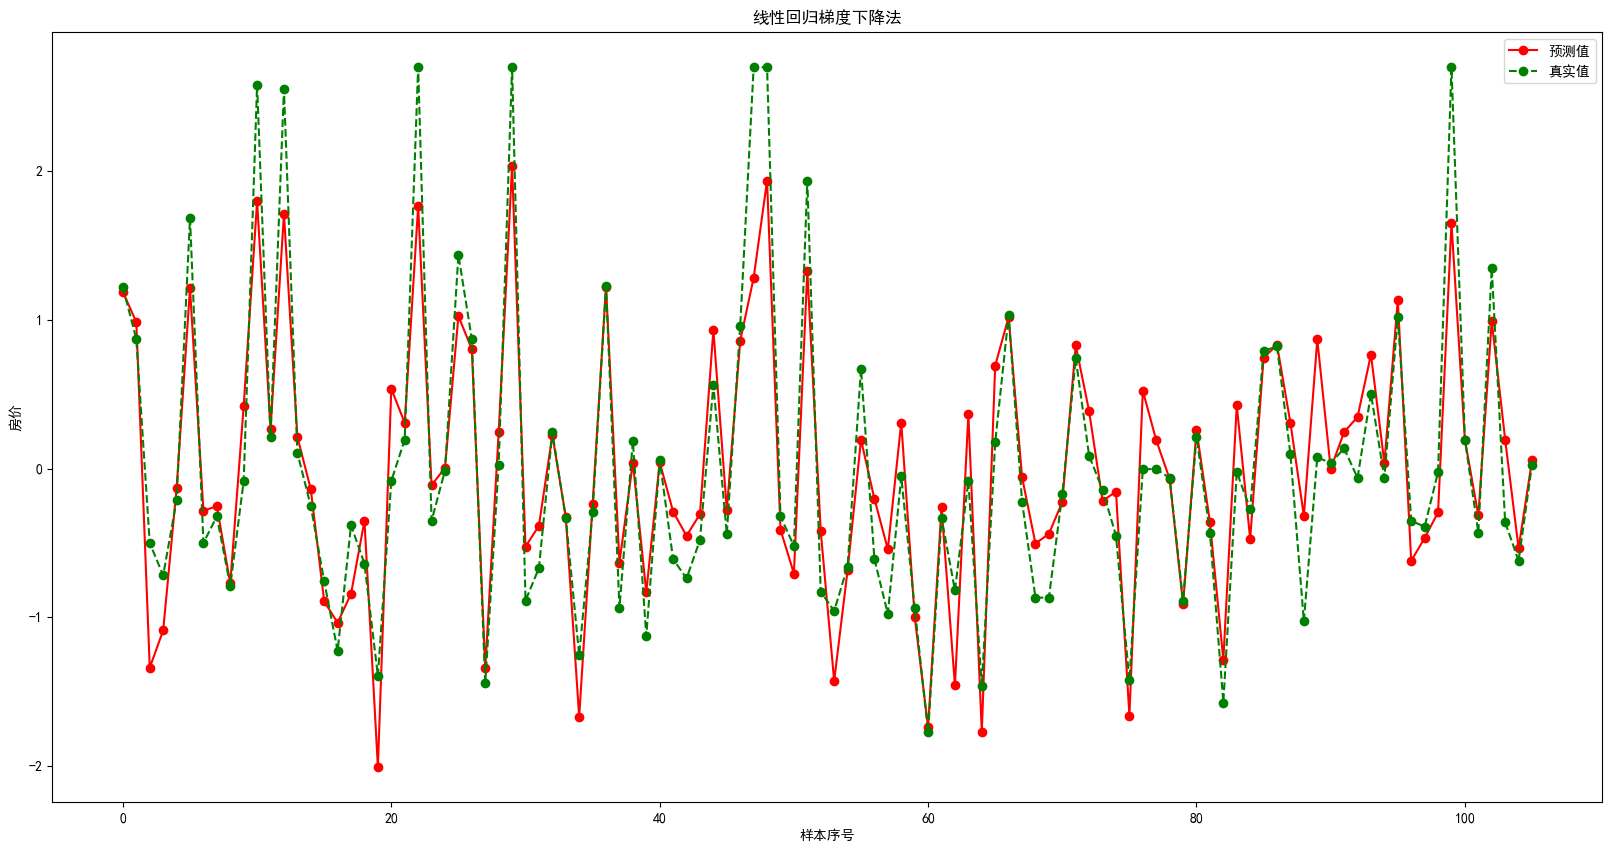

In [55]:
plt.figure(figsize=(20,10))
plt.plot(result, "ro-", label="预测值")
plt.plot(test_y.values, "go--", label="真实值")
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.title('线性回归梯度下降法')
plt.legend(loc='best')
plt.show()

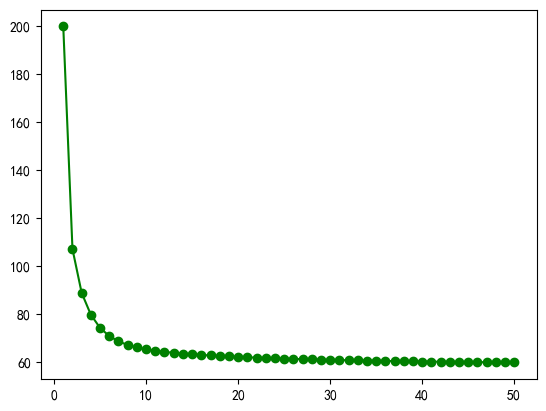

In [57]:
# 绘制误差值
plt.plot(range(1, lr.times+1), lr.loss, "go-")


In [62]:
# 房价分析涉及维度过多，只取其中一个维度 rm，实现
lr = LinearRegression(alpha=0.0005, times=50)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, 5:6]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, 5:6]
test_y = t.iloc[400:, -1]

# 标准化处理
s = Standarscaler()
train_X = s.fit_transform(train_X)
test_X = s.fit_transform(test_X)
s2 = Standarscaler()
train_y = s2.fit_transform(train_y)
test_y = s2.fit_transform(test_y)


lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result-test_y)**2))


0.3544494868829932

array([-2.77333712e-16,  6.54984608e-01])

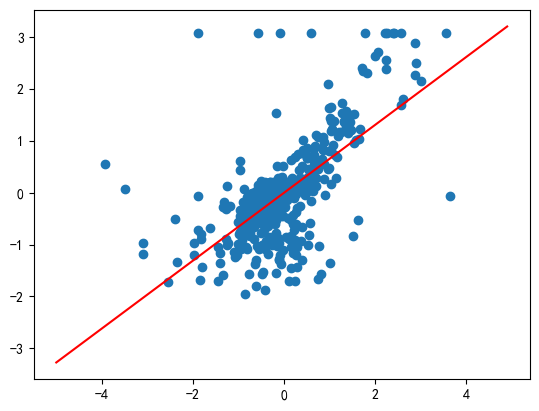

In [69]:
plt.scatter(train_X["rm"], train_y)
#查看方程系数
display(lr.w)
# 构建方程
x = np.arange(-5, 5, 0.1)
y = 6.54984608e-01*x+-2.77333712e-16
#plt.plot(x, y, "r") 或
plt.plot(x, lr.predict(x.reshape(-1,1)), "r")
